<a href="https://colab.research.google.com/github/donw385/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
from keras.datasets import boston_housing, fashion_mnist

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(42)

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(404, 13) (404,) (102, 13) (102,)


In [0]:
import keras

In [0]:
X_train = keras.utils.normalize(X_train, axis=-1, order=2)
X_test = keras.utils.normalize(X_test, axis=-1, order=2)

In [14]:
model = Sequential()
model.add(Dense(5, input_dim=13, activation="relu"))
model.add(Dense(30, activation='relu'))
model.add(Dense(29, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=150)
model.summary()



Epoch 1/150
404/404 [==============================] - 1s 2ms/step - loss: 580.6081 - mean_squared_error: 580.6081
Epoch 2/150
404/404 [==============================] - 0s 52us/step - loss: 573.8648 - mean_squared_error: 573.8648
Epoch 3/150
404/404 [==============================] - 0s 49us/step - loss: 564.3207 - mean_squared_error: 564.3207
Epoch 4/150
404/404 [==============================] - 0s 50us/step - loss: 549.8397 - mean_squared_error: 549.8397
Epoch 5/150
404/404 [==============================] - 0s 48us/step - loss: 527.9162 - mean_squared_error: 527.9162
Epoch 6/150
404/404 [==============================] - 0s 51us/step - loss: 495.6097 - mean_squared_error: 495.6097
Epoch 7/150
404/404 [==============================] - 0s 49us/step - loss: 451.2192 - mean_squared_error: 451.2192
Epoch 8/150
404/404 [==============================] - 0s 54us/step - loss: 391.3475 - mean_squared_error: 391.3475
Epoch 9/150
404/404 [==============================] - 0s 51us/step - los

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [15]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape each image into a single line of floats between 0 and 1
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import numpy as np

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [0]:
np.random.seed(42)

# Two inner layers of 28 each, 
def NN1():
    model = Sequential()
    model.add(Dense(28, activation='relu', input_dim=784))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
model = NN1()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.7983 - acc: 0.7376 - val_loss: 0.5196 - val_acc: 0.8202
Epoch 2/50
 - 1s - loss: 0.4593 - acc: 0.8407 - val_loss: 0.5042 - val_acc: 0.8219
Epoch 3/50
 - 1s - loss: 0.4203 - acc: 0.8524 - val_loss: 0.4349 - val_acc: 0.8517
Epoch 4/50
 - 1s - loss: 0.3941 - acc: 0.8611 - val_loss: 0.4223 - val_acc: 0.8538
Epoch 5/50
 - 1s - loss: 0.3775 - acc: 0.8673 - val_loss: 0.4127 - val_acc: 0.8554
Epoch 6/50
 - 1s - loss: 0.3708 - acc: 0.8672 - val_loss: 0.4008 - val_acc: 0.8600
Epoch 7/50
 - 1s - loss: 0.3570 - acc: 0.8722 - val_loss: 0.3989 - val_acc: 0.8593
Epoch 8/50
 - 1s - loss: 0.3458 - acc: 0.8770 - val_loss: 0.4110 - val_acc: 0.8544
Epoch 9/50
 - 1s - loss: 0.3400 - acc: 0.8788 - val_loss: 0.4039 - val_acc: 0.8565
Epoch 10/50
 - 1s - loss: 0.3335 - acc: 0.8809 - val_loss: 0.3844 - val_acc: 0.8660
Epoch 11/50
 - 1s - loss: 0.3264 - acc: 0.8826 - val_loss: 0.3850 - val_acc: 0.8649
Epoch 12/50
 - 1s - loss: 0.3220 - 

In [0]:
import matplotlib.pyplot as plt

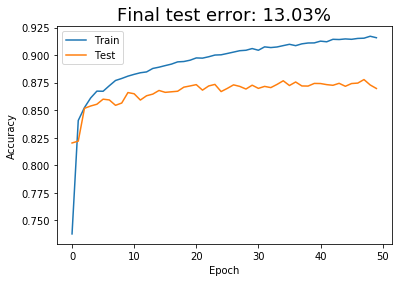

In [23]:

scores = model.evaluate(x_test, y_test, verbose=0)
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label = 'Train')
ax.plot(history.history['val_acc'], label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.title(f'Final test error: {100-scores[1]*100:.2f}%', fontsize=18)
plt.legend()
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.